<a href="https://colab.research.google.com/github/Aishwary-25/Machine_Learning_Projects/blob/main/3DPrinterProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**`Linear Regression analysis of the 3D prinitng dataset`**


In this notebook, we will perform simple linear regression analysis of the 3D printing dataset and study the various relationships existing between the target variables AKA labels and the predictor varibale AKA features.
1. Importing the Dataset in to the notebook
In this section, we will import the 3d printer for mechanical engineers.csv file into the workbook and look at some basic information like number of rows and columns, their datatypes, notes (if any), missing values (if any).
Before importing the dataset, let's import the basic libraries for machine learning like pandas, numpy, matplotlib and seaborn

In [5]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the Dataset using .read_csv() function of pandas
#We will call the dataset as 'printer'

df = pd.read_csv('3d printing data.csv')

In [7]:
#Let's check few rows of the dataset using the .head() function of pandas

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


The publisher of this dataset left few information regarding the dataset. I will put them here:



*   The dataset contains 12 columns.
*   The first 9 columns i.e from layer_height to fan_speed are features.
*   The last 3 columns i.i from roughness to elongation are labels. So, we will be predicting these three based on the 9 features.
*   The various units of the nine features are as follows:


             1. Layer Height in mm
             2. Wall Thickness in mm
             3. Infill Density in %
             4. Infill Pattern in either Grid or Honeycomb
             5. Nozzle Temperature in Degree C
             6. Bed Temperature in degree C
             7. Print speed in mm/s
             8. Material in either abs or pla
             9. Fan Speed in %


*  The units of the labels are as follows



             1. Roughness in micro metre
             2. Tension Strength in MPa

In [8]:
df.shape

(50, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


**Basic information:**



*   The dataset contains 50 rows of data.
*  The columns infill_pattern and material consists of categorical entries (infill_pattern = grid or honeycomb and material = abs or pla) instead of numerical entries.


2. Data Visualization
In this section we will visualize the data in the form of heatmaps and pairplots

Here we will consider the roughness as the only label and we will predict that using the 9 features.

First, let's convert the categorical features into numerical ones using the .replace() function of numpy

We will replace infill_pattern and material as follows

Grid as 0 and honeycomb as 1
abs as 0 and pla as 1

In [10]:
df['infill_pattern'].replace(['grid','honeycomb'],[0,1],inplace=True)
df['material'].replace(['abs','pla'],[0,1],inplace=True)

In [11]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [12]:
df['layer_height'].describe()

count    50.000000
mean      0.106000
std       0.064397
min       0.020000
25%       0.060000
50%       0.100000
75%       0.150000
max       0.200000
Name: layer_height, dtype: float64

<Axes: ylabel='Density'>

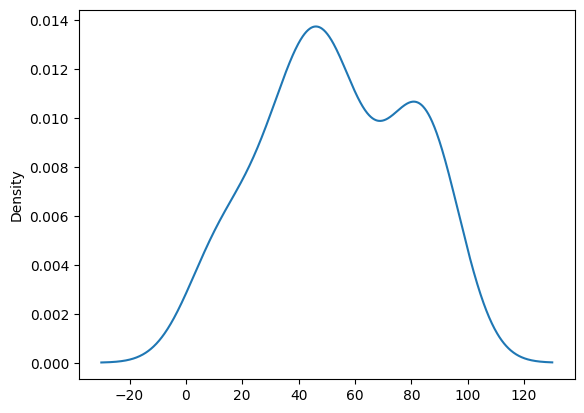

In [13]:
df['infill_density'].plot(kind='kde')

<Axes: >

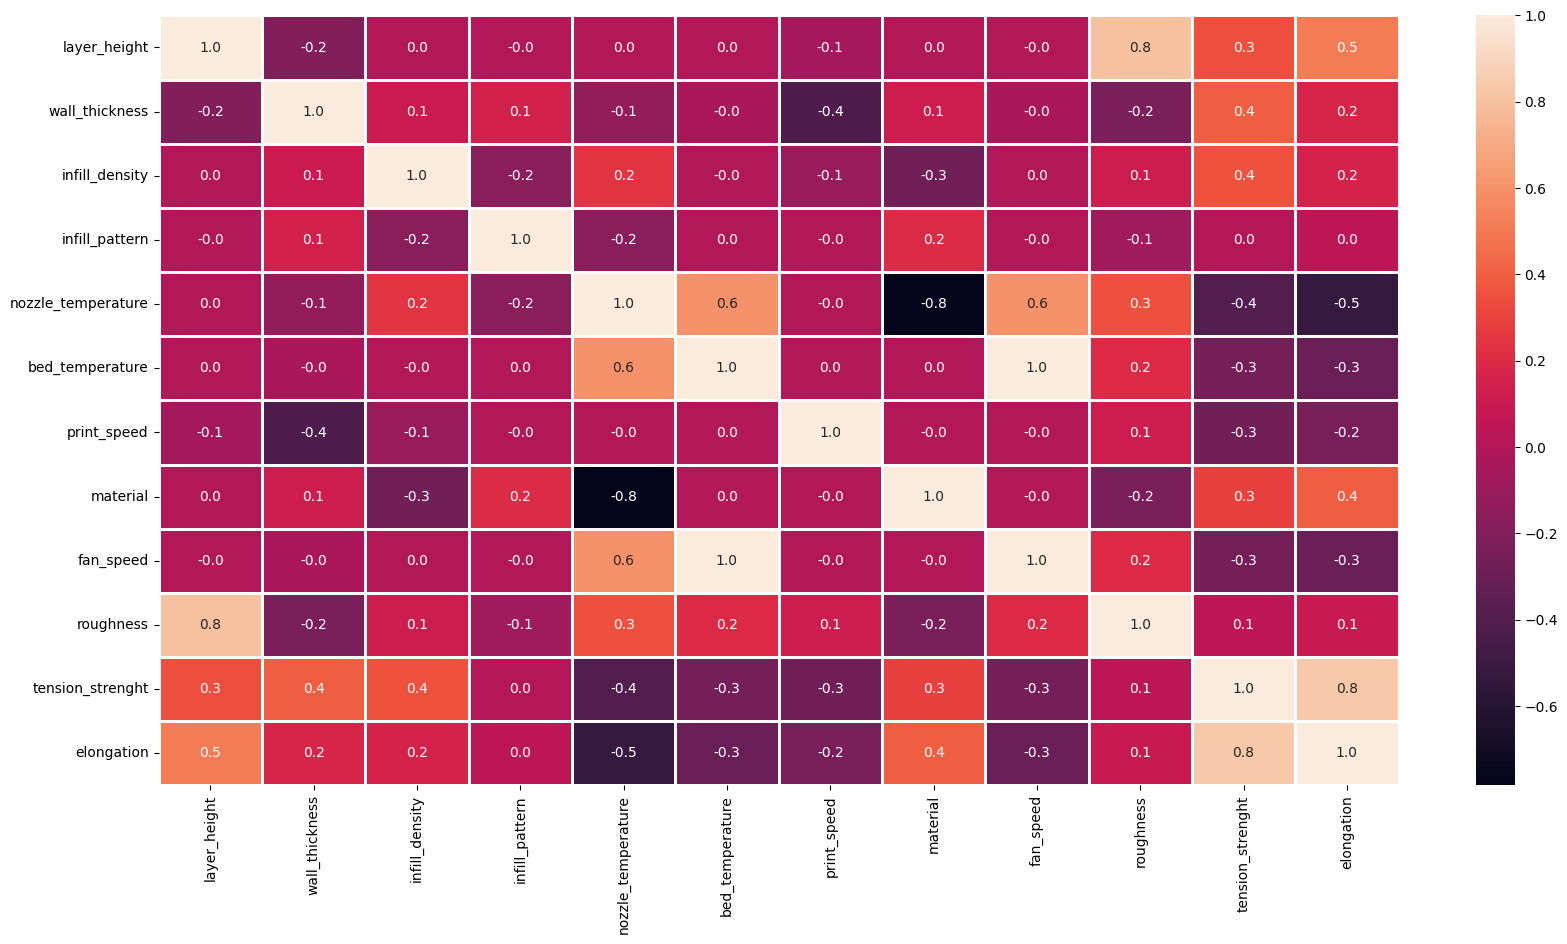

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f',linewidths=2)

**Inference from Heatmap:**


1.   Roughness is correlated to layer height meaning as layer height (feature) increases, roughness increases as well.

2.   Material is negatively correlated with nozzle temperarure. So, if nozzle tmperature increases, the material quality dimnishes.

3.   Bed temperature is correlated with nozzle temperature. As nozzle temperature increases, bed temperature increases.
4.   Fan speed is positively correlated with nozzle temperature as well.


5.  Fan speed is full positively correlated (1) with bed temperature.


6.  The labels elongation and tension strength are positively correlated as well.

In [15]:
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

In [16]:
result_cols = ['roughness','tension_strenght','elongation']
input_cols_class = ['layer_height',
              'wall_thickness',
              'infill_density',
              'nozzle_temperature',
              'bed_temperature',
              'print_speed',
              'fan_speed']
input_cols_dis = ['infill_pattern','material']

<ipython-input-17-f61ba6c442d2>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


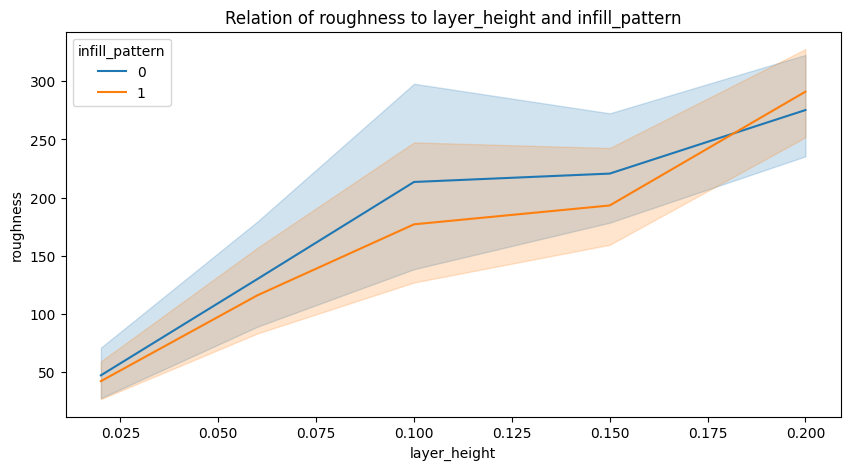

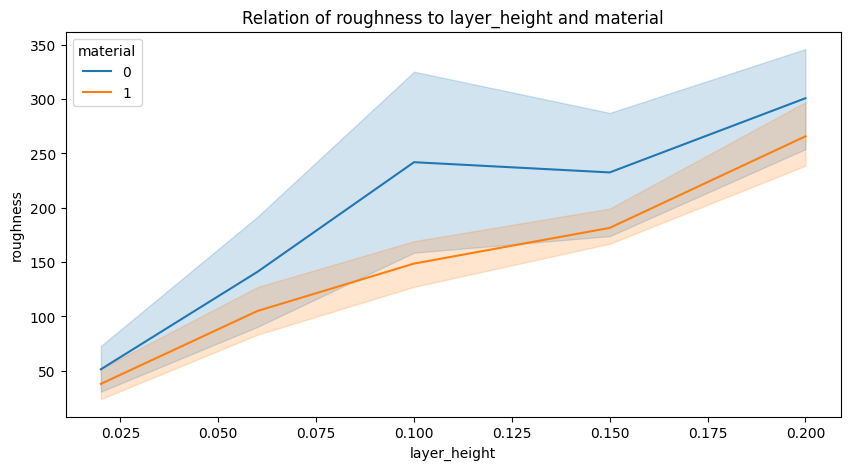

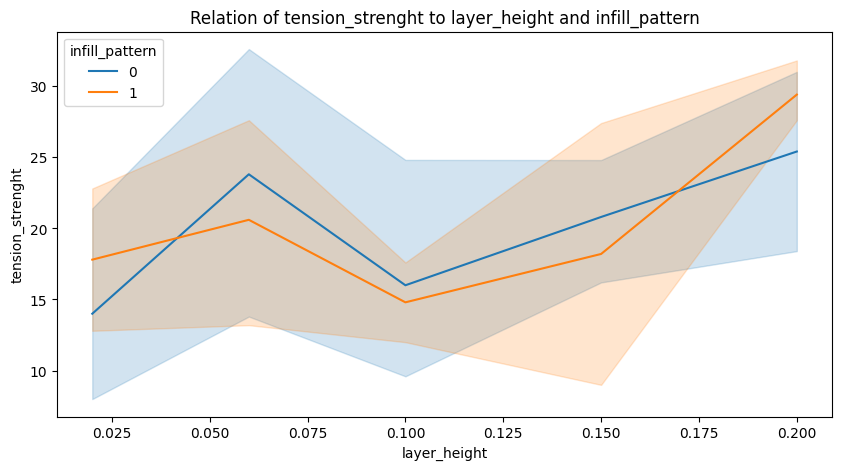

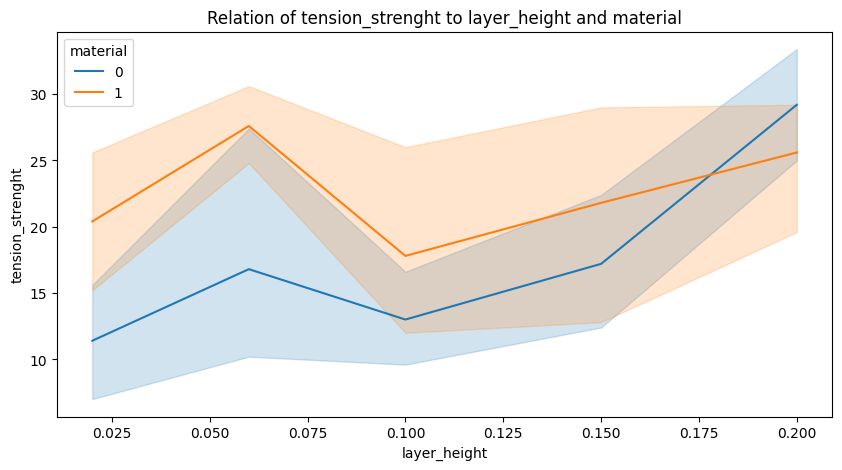

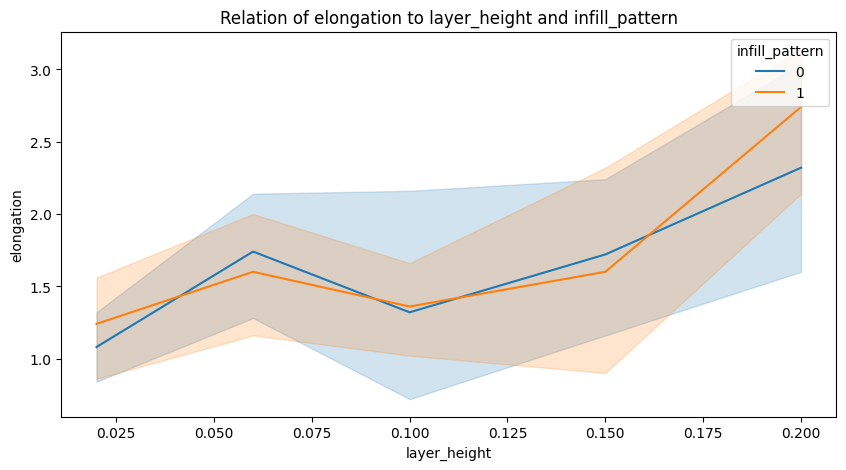

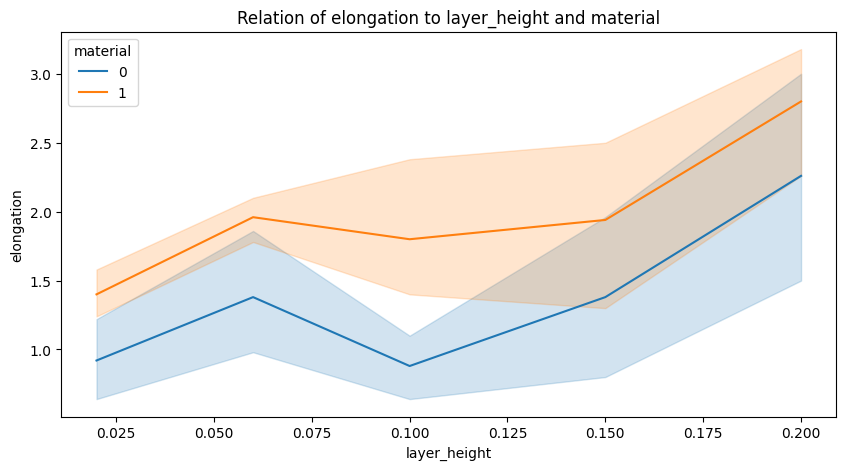

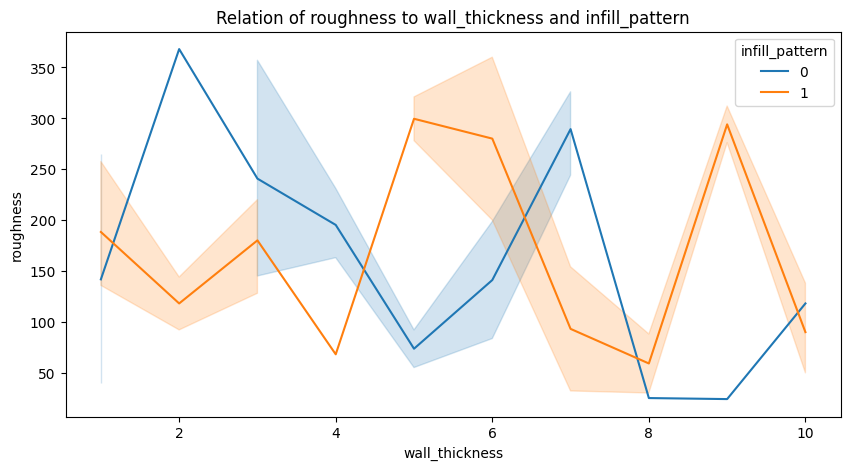

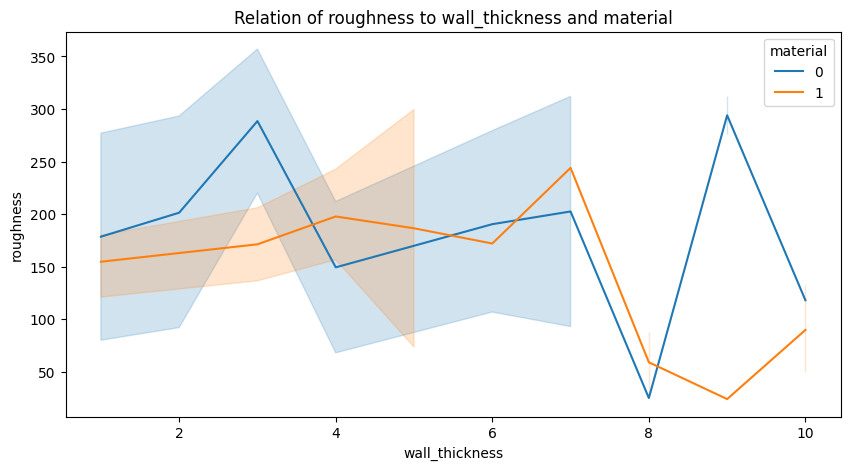

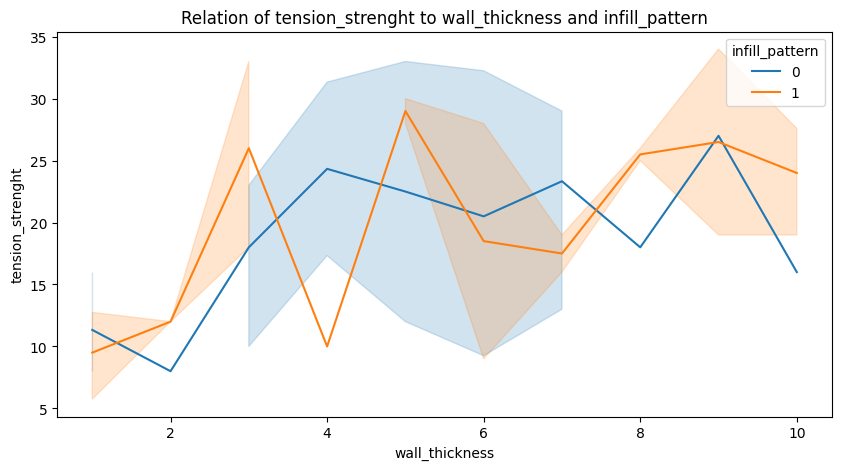

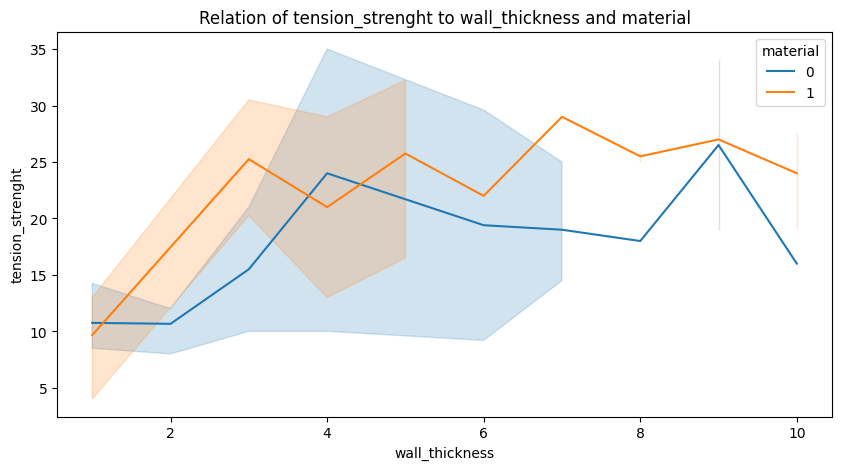

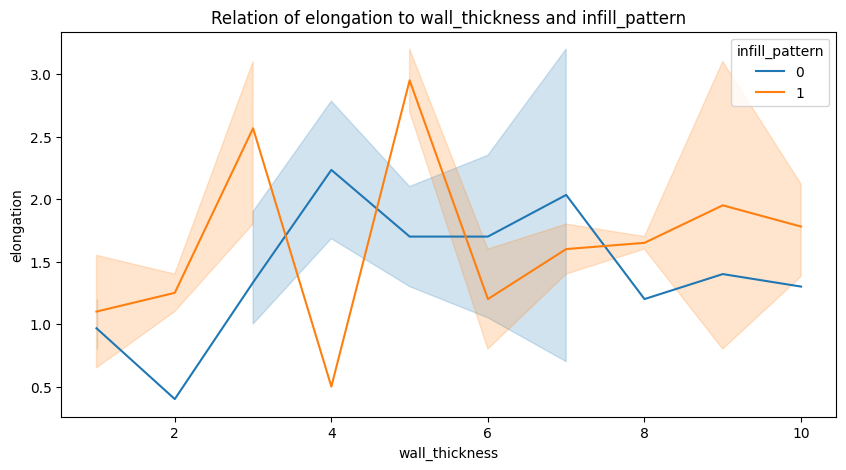

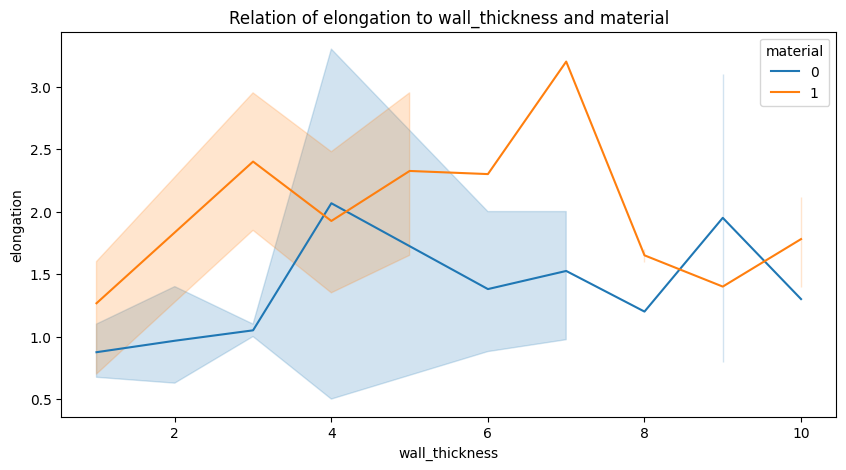

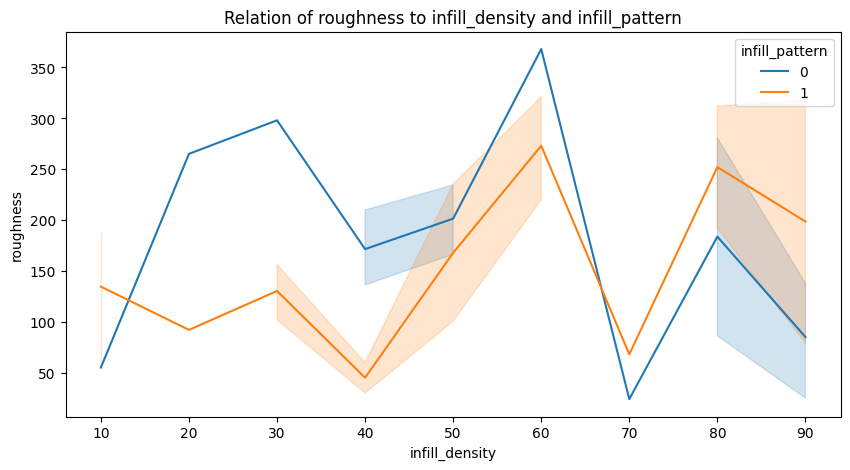

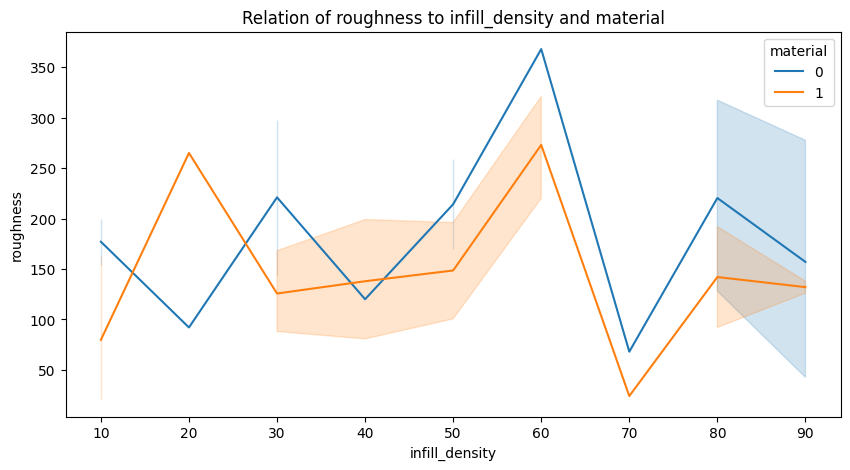

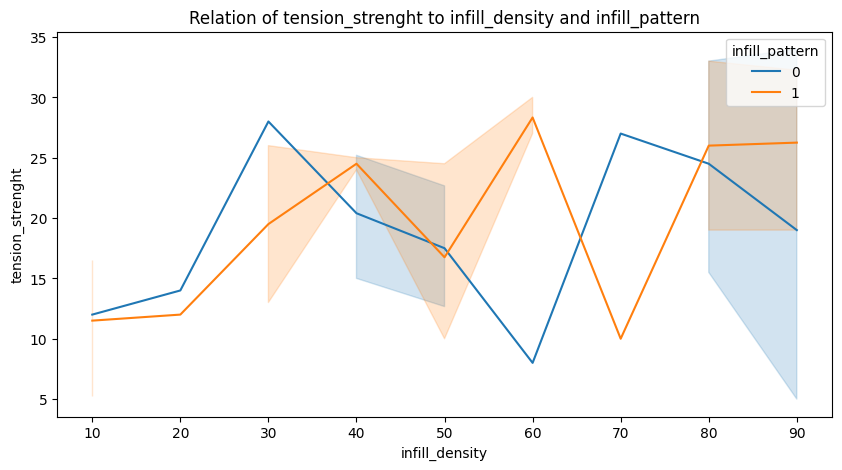

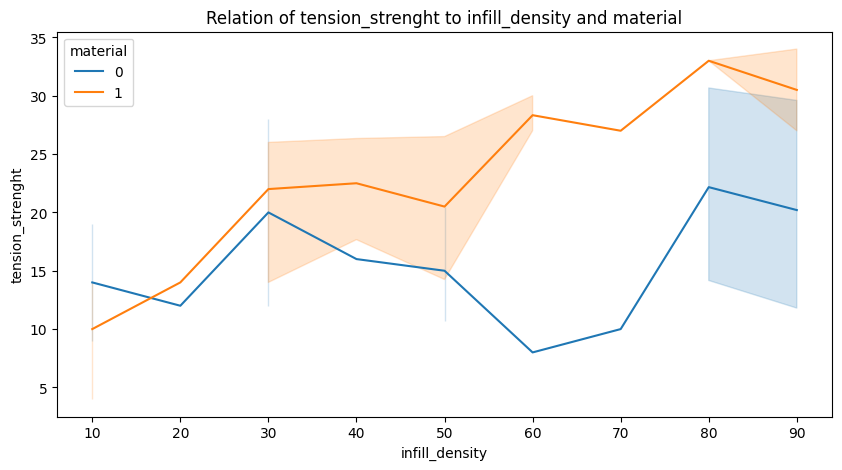

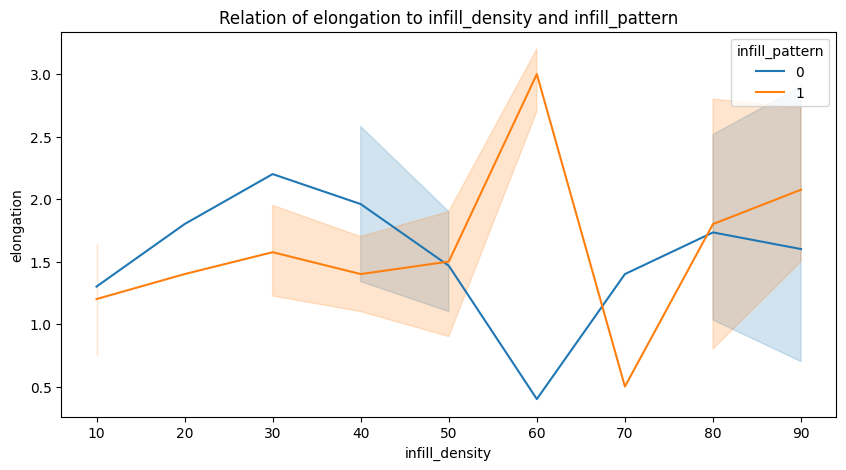

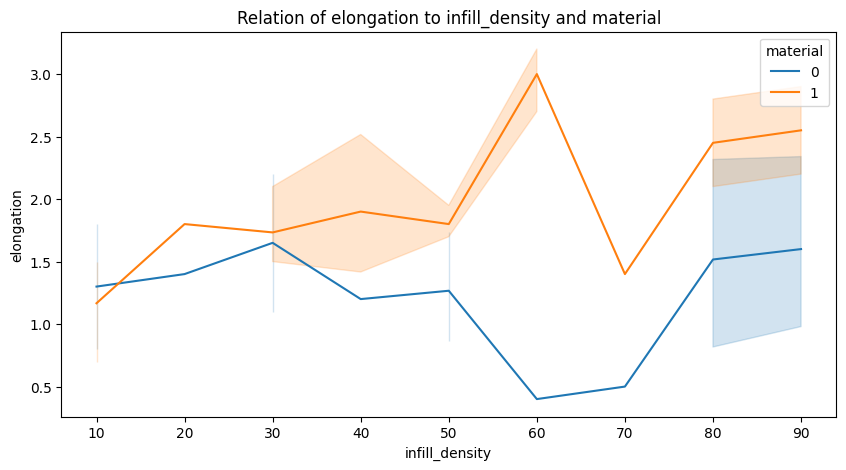

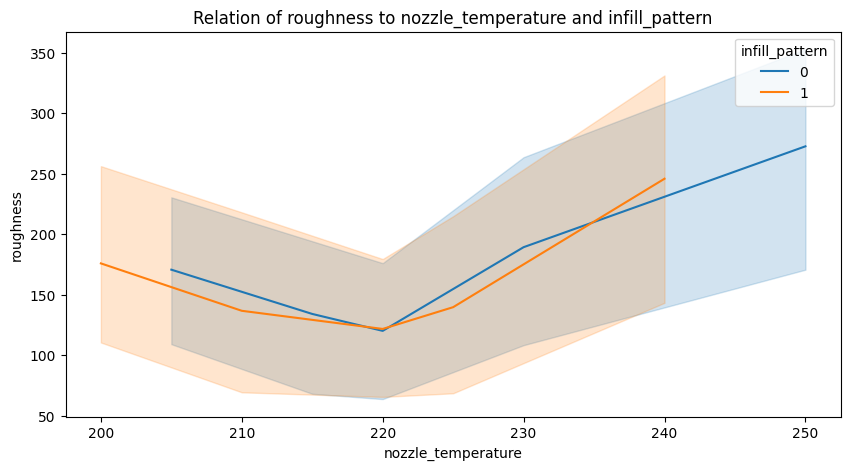

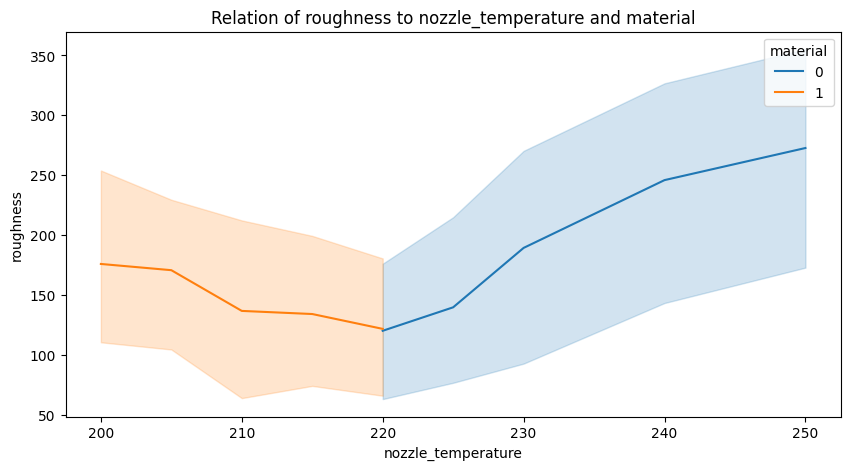

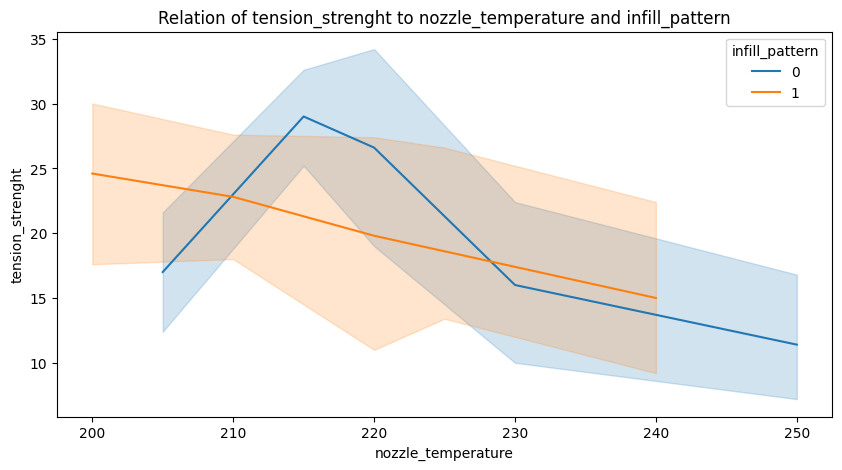

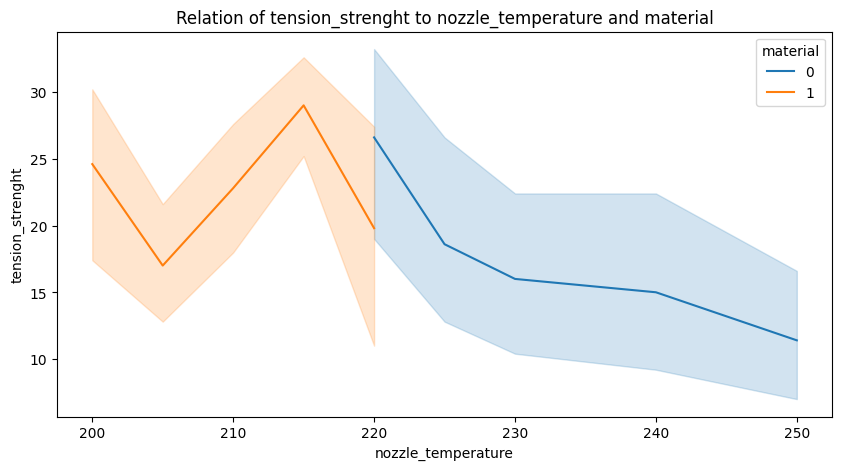

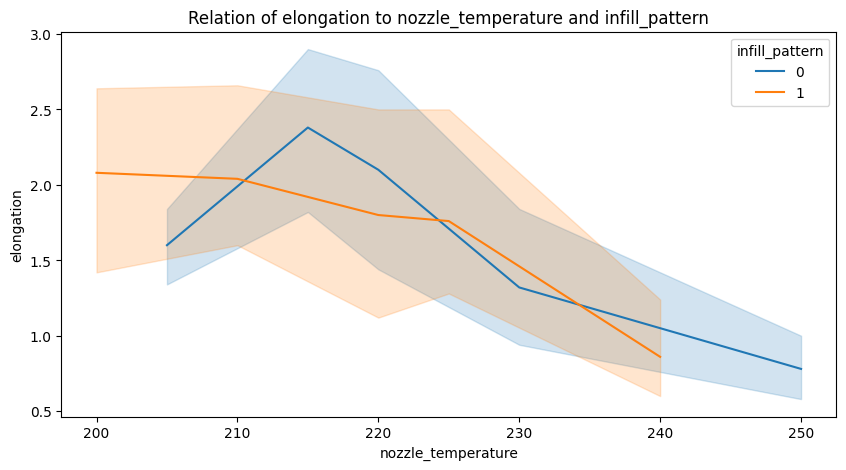

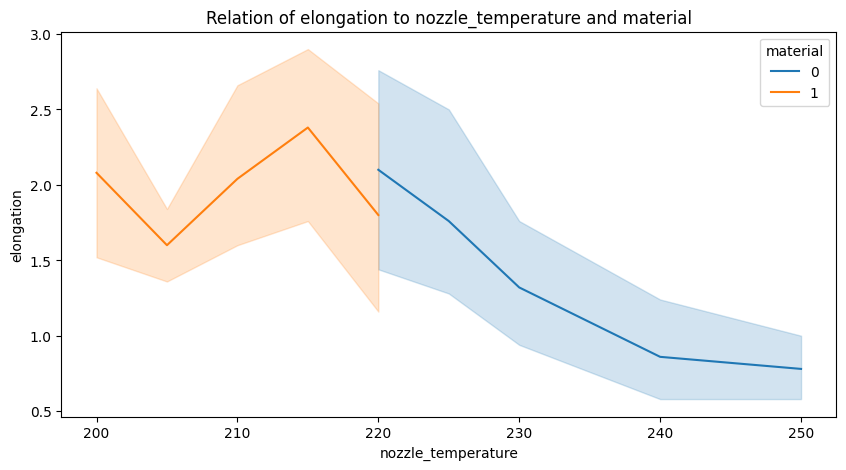

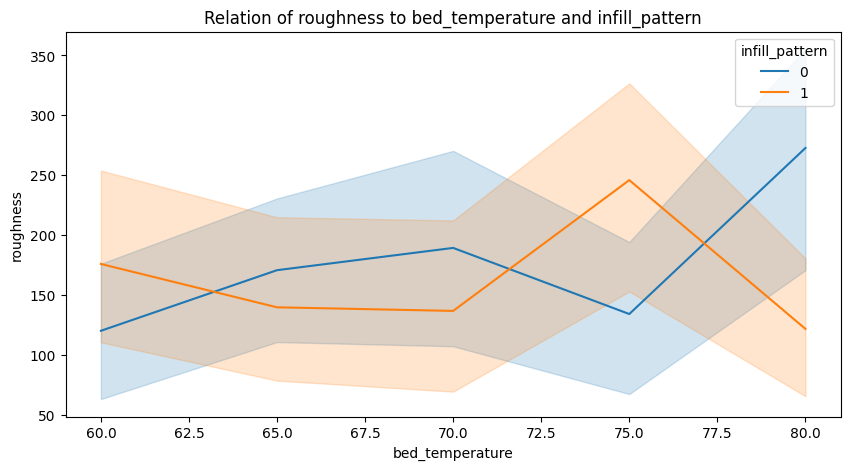

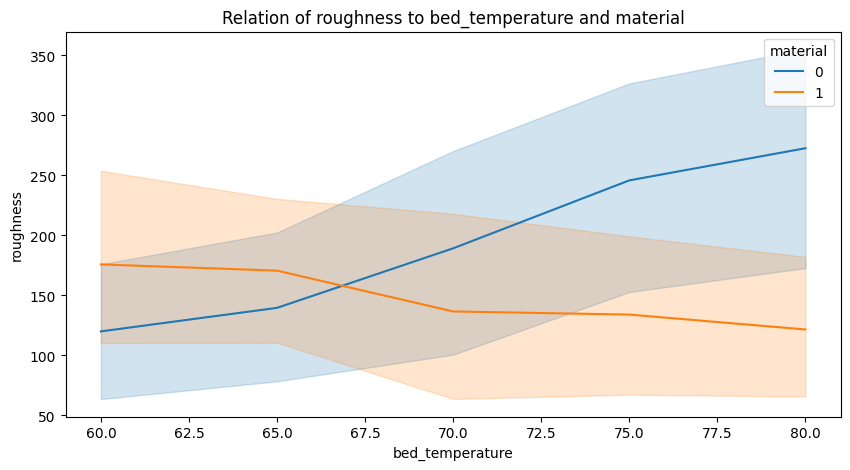

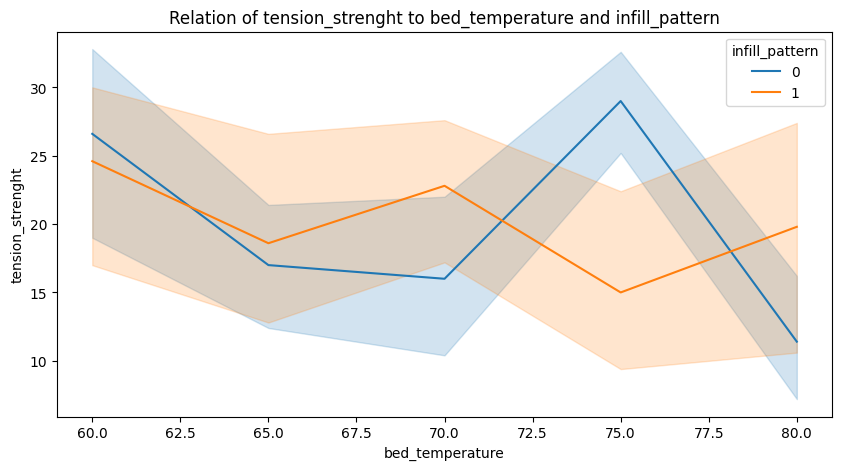

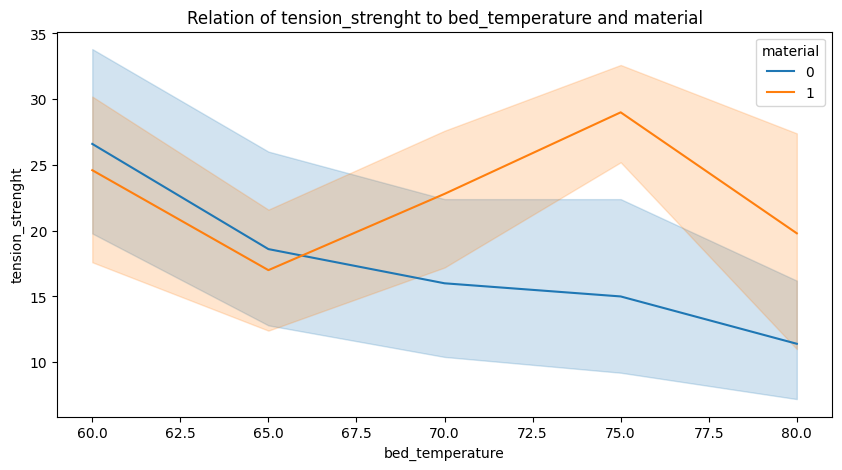

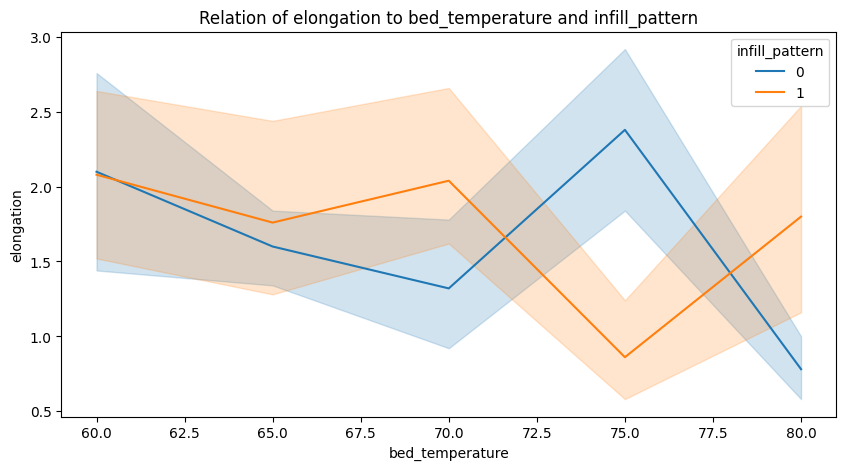

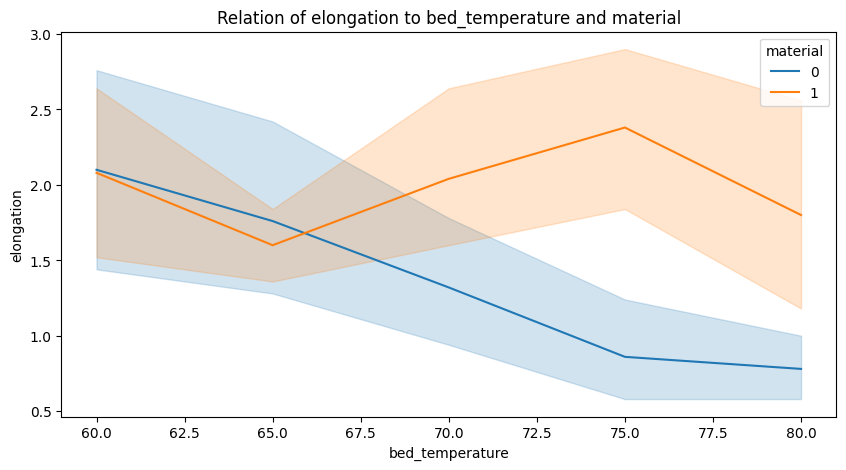

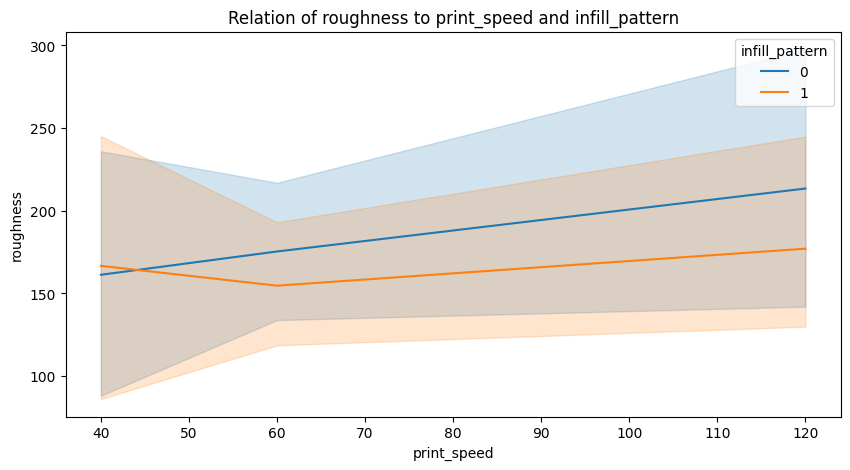

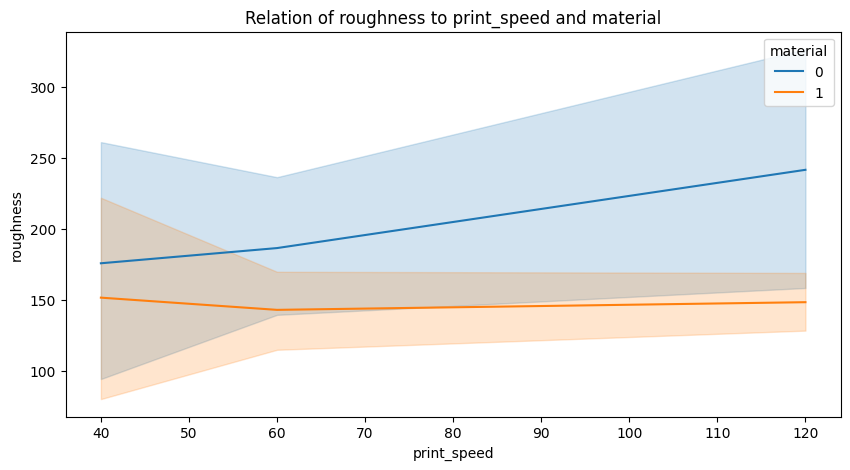

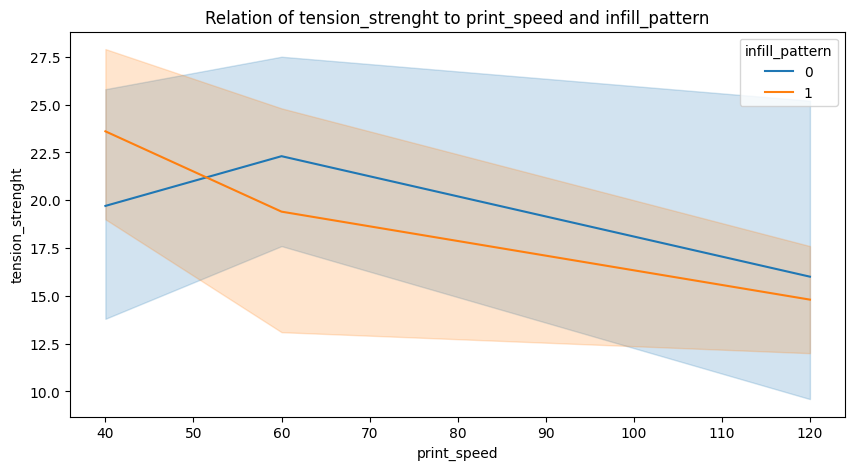

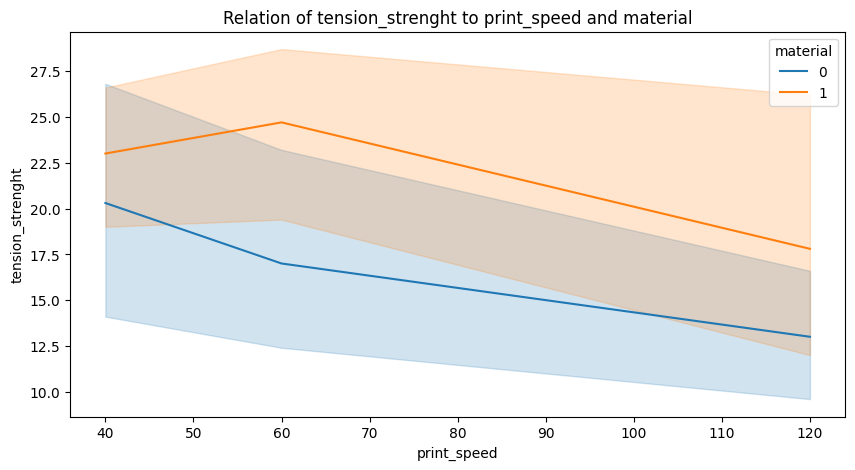

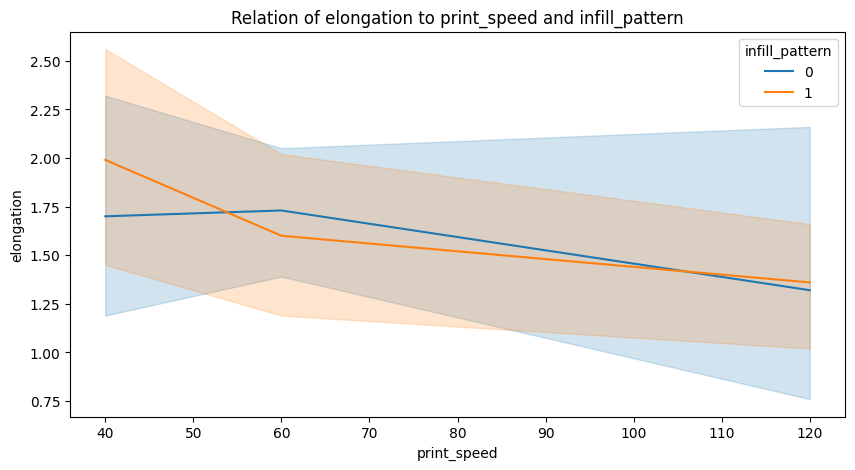

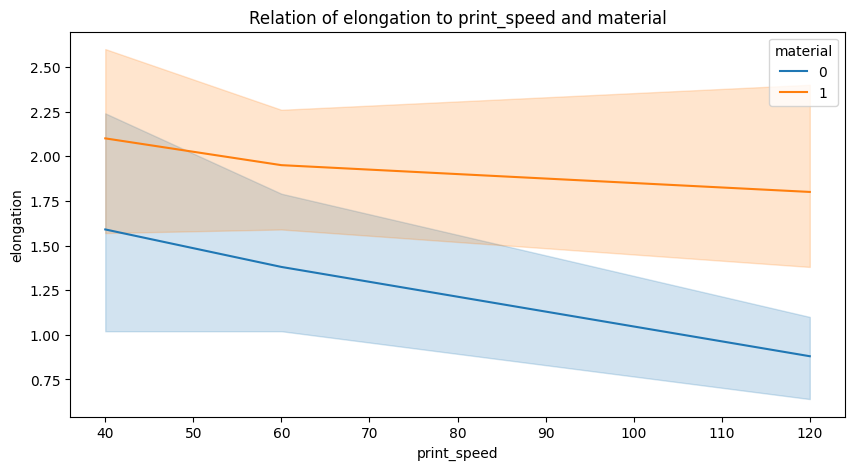

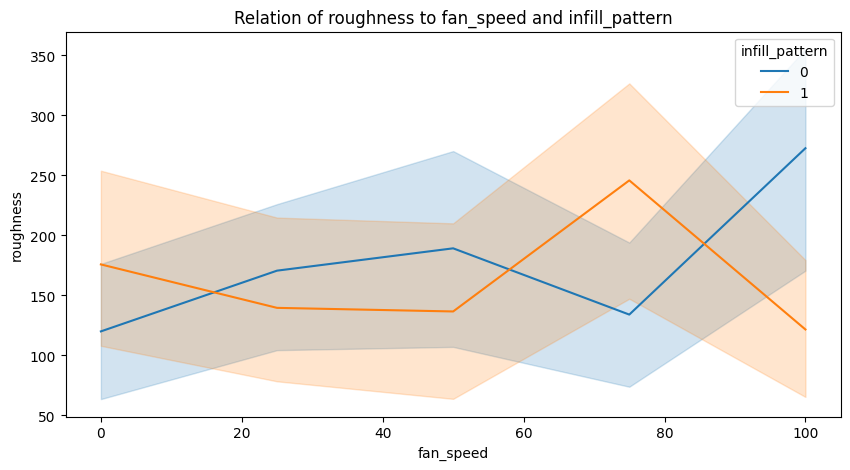

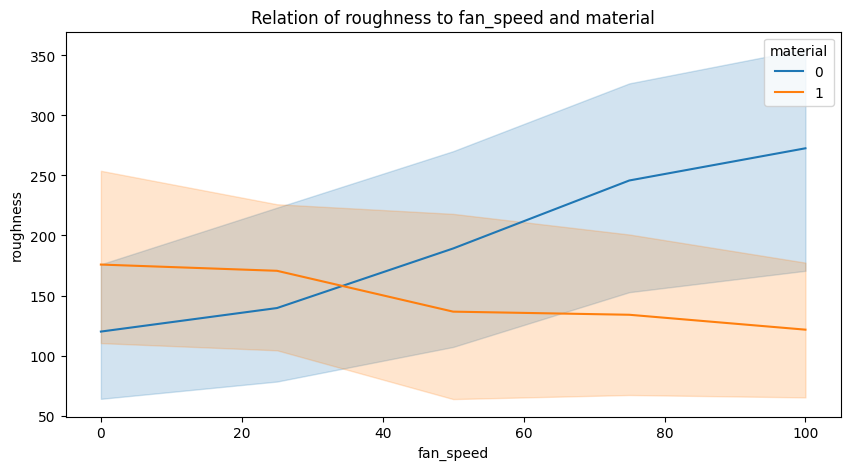

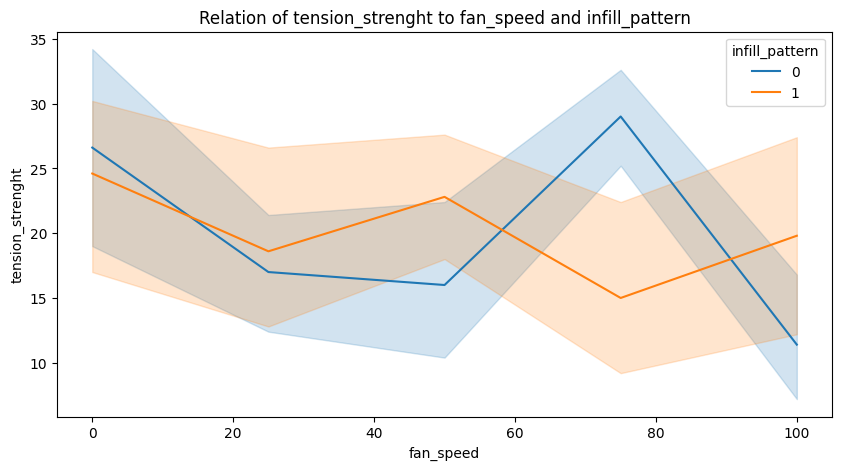

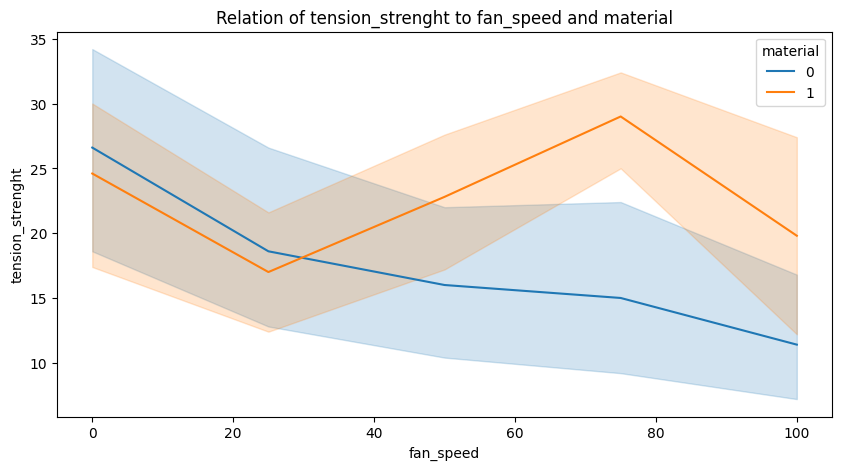

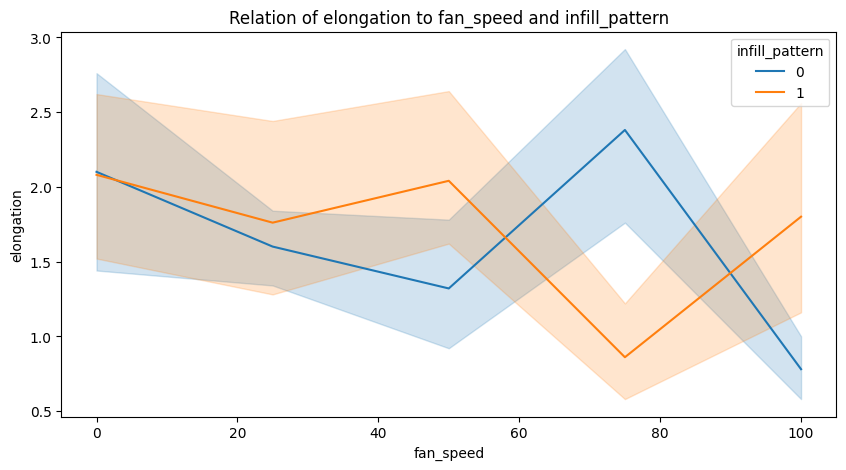

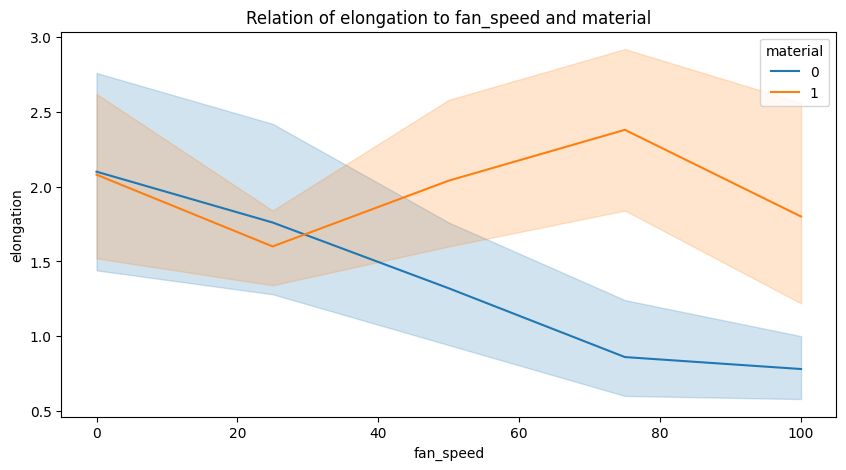

In [17]:
for y in input_cols_class:
    for x in result_cols:
        for z in input_cols_dis:
            plt.figure(figsize=(10,5))
            sns.lineplot(x=df[y],y=df[x], estimator='mean', hue=df[z]).set_title(f"Relation of {x} to {y} and {z}")

In [18]:
X = df.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = df['roughness']

In [19]:
import statsmodels.api as sm

In [20]:
def linear_Regression(x,y):
    
    x = sm.add_constant(x)
    
    #defining the model, fitting the model and printing the results
    multiple_model = sm.OLS(y,x).fit()
    print(multiple_model.summary())

In [21]:
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     35.95
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           3.83e-16
Time:                        04:59:50   Log-Likelihood:                -248.19
No. Observations:                  50   AIC:                             514.4
Df Residuals:                      41   BIC:                             531.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9534      0

**Inference from model**


1.   The R-squared value is 0.875 ot 87.5% which states that about 87.5% of proportion of variability in data can be explained by this linear regression model. The r-squared is the most important parameter for a model evaluation. higher the value, better is the fit.

2.   The p-value is an important measure for evaluating the various variables. Closer is the p-value to 1, the lesser is that feature variable has to do with the label variable. In our model, wall thickness, infill_density and infill_pattern are all close to 1 meaning they don't play much role in roughness.


3.   Finally, the expression for this model can be written from the coefficients as follows

Roughness = -0.9534 + 1269.4449*layer_height + 2.3342*wall_thickness - 0.0423*infill_density - 0.1255*infill_pattern + 15.0562*nozzle_temperature - 55.6225*bbed_temperature + 0.6496*print_speed + 298.4514*material + 7.8989*fan_speed

**The coefficients suggest the following**


*  In the absence of all the parameters, the roughness decreases by 0.9534 micro metre by the constant term. This may be due to other factors like ambient temperature which are not considered for the model.
*  A positive coefficient value states that an increase in wall thickness (example) by 1 mm results in increase in roughness by 2.3342 micro metre.

* Similarly, a negative coefficient value states that an increase in bed temperature by a degree C causes 55.6225 micro metre decrease in roughness.

Now let's eliminate wall thickness, infill density and infill pattern and build the model to see if there's any improvement.

In [22]:
X = X.drop(['wall_thickness','infill_density','infill_pattern'], axis = 1)

In [23]:
#calling the linear regression function
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.67e-18
Time:                        04:59:50   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

**Inference**


1.   The R-squared value decreases to 87.2% which is not much decrease.

2.   The p-values of all the considered features do play an important role in predicting the label.
3.   We can improve the model further by considering interaction terms based on the correlation heatmap.
4.  The various interaction terms are as follows:

*  Material and nozzle temperature (-0.78)
*   Bed temperature and nozzle temperature (0.6)
*   Fan speed and nozzle temperatue (0.6)
*   Fan speed and bed temperature (1)


In [24]:
#get the interaction terms by multiplying values

inter_mn = X['material']*X['nozzle_temperature']
inter_bn = X['bed_temperature']*X['nozzle_temperature']
inter_fn = X['fan_speed']*X['nozzle_temperature']
inter_fb = X['fan_speed']*X['bed_temperature']

In [25]:
#adding these interaction terms to dataset using .concat() function of pandas
#we will call this dataset as interaction

interaction = pd.concat([X,inter_mn,inter_bn,inter_fn,inter_fb], axis = 1)

#chenge column names of this interaction terms
interaction = interaction.rename(columns = {0:'interct_mn', 1:'interact_bn', 2:'interact_fn',
                             3:'interact_fb'})

interaction.head(10)

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,220,60,40,0,0,0,13200,0,0
1,0.02,225,65,40,0,25,0,14625,5625,1625
2,0.02,230,70,40,0,50,0,16100,11500,3500
3,0.02,240,75,40,0,75,0,18000,18000,5625
4,0.02,250,80,40,0,100,0,20000,25000,8000
5,0.02,200,60,40,1,0,200,12000,0,0
6,0.02,205,65,40,1,25,205,13325,5125,1625
7,0.02,210,70,40,1,50,210,14700,10500,3500
8,0.02,215,75,40,1,75,215,16125,16125,5625
9,0.02,220,80,40,1,100,220,17600,22000,8000


In [26]:
# NOw let's fit this model to the linear regression function

linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     63.22
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.31e-20
Time:                        04:59:50   Log-Likelihood:                -235.45
No. Observations:                  50   AIC:                             488.9
Df Residuals:                      41   BIC:                             506.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0735      0

**Model Summary**

*  Alright now, we have an increased R-squared of 92.5% or 0.925 which is very high.
*  We will stop here and declare this model as the most suitable for predicting roughness